In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn import datasets
import warnings
from scipy import stats

In [2]:
iris = datasets.load_iris()
X = iris.data[:,0:2]
y = iris.target

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

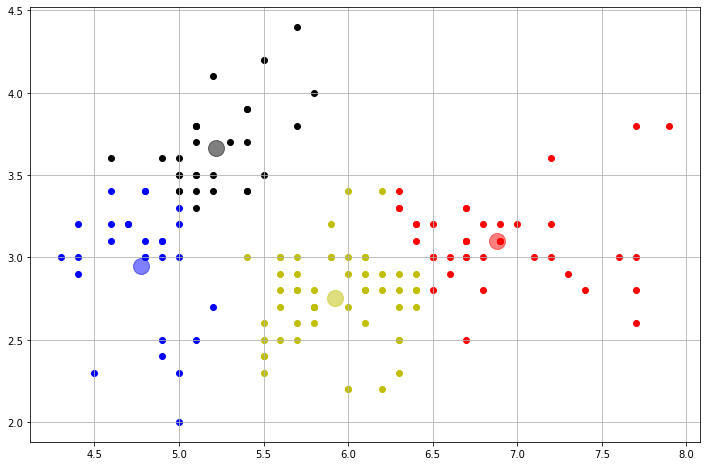

In [3]:
assignments = kmeans.labels_ # this is the CLUSTERS column in your case
plt.figure(figsize=(12,8))
classes = np.unique(assignments)
colors= ['r','b','k','y'] # 4 CLUSTERS SO 4 COLORS HERE
for s,l in enumerate(classes):
    xs = X[:,0] 
    ys = X[:,1] 
    plt.scatter(xs[assignments==s], ys[assignments==s], c = colors[s]) # color based on group
plt.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], 'ro',markersize=16, alpha = 0.5, label='')
plt.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], 'bo',markersize=16, alpha = 0.5)
plt.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], 'ko',markersize=16, alpha = 0.5)
plt.plot(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][1], 'yo',markersize=16, alpha = 0.5)
plt.grid()

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [5]:
# loading dataset into Pandas DataFrame
df = pd.read_csv(url , names=['sepal length','sepal width','petal length','petal width','target'])

In [6]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values

y = df.loc[:,['target']].values

x = StandardScaler().fit_transform(x)

In [8]:
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df['target'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: target, dtype: int64

In [12]:
rows, col = df.shape
print("Rows : %s, column : %s" % (rows, col))

Rows : 150, column : 5


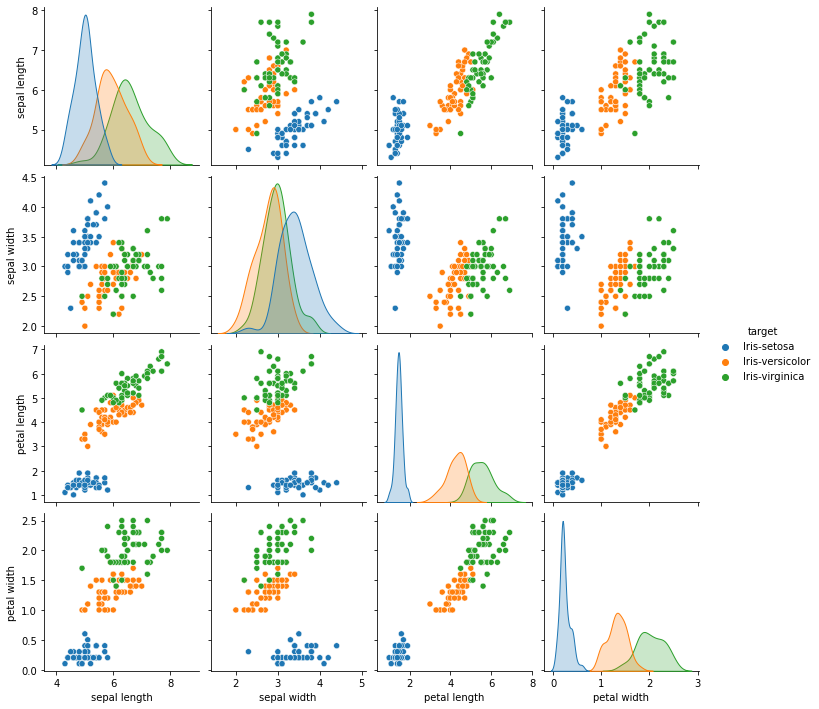

In [13]:
# data visualization
sns.pairplot(df, hue= 'target')

In [21]:
# load iris sample dataset
import seaborn.apionly as sns
iris = sns.load_dataset('iris')
 
# import scipy
from scipy import polyval, stats
 
fit_output = stats.linregress(iris["petal_length"], iris["petal_width"])
slope, intercept, r_value, p_value, slope_std_error = fit_output
print(slope, intercept)

/usr/local/lib/python3.7/dist-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


0.41575541635241114 -0.36307552131902776


In [24]:
# use scipy polyval to create y-values from x_data and the linregress fit parameters
scipy_fitted_y_vals = polyval([slope,intercept],iris["petal_length"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  


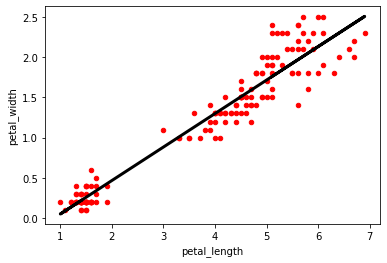

In [25]:
import matplotlib.pyplot as plt
axes = iris.plot(x="petal_length", y="petal_width", kind="scatter", color="red")
plt.plot(iris["petal_length"], scipy_fitted_y_vals, color='black', linewidth=3)
plt.show()